# Ejemplo de proyecto de ML

Para todo proyecto de machine learning conviene seguir los pasos siguientes:

1. Determinar que problema queremos resolver, cual es la pregunta que queremos responder.
2. Obtener los datos y limpiarlos.
3. Explorar los datos mediante visualizaciones y sumarios.
4. Preparar los datos para los métodos que pensamos probar (escalar, normalizar, binning, one-hot encoding, etc).
5. Probar los distintos modelos y seleccionar los mejores.
6. Ajustar los (hiper)parámetros para tener los mejores resultados. También podemos combinar distintos modelos en un ensamble.
7. Presentar los resultados.

## Objetivo

Nos interesa predecir el precio de las casas en el estado California. Para eso vamos a usar datos del censo de 1990 que incluye mediciones de población, ingreso, y precio mediano de las casas para cada bloque censal (un bloque censal es una unidad geográfica utilizada por la oficina de censo de Estados Unidos, típicamente tiene entre 600 y 3000 habitantes).

### Scoring

Para evaluar nuestras predicciones, vamos a usar [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

## Data

https://github.com/ageron/handson-ml/tree/master/datasets/housing

> This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Datos habitacionales de California del censo de 1990.

Atributos:
- latitud
- longitud
- mediana de la antigüedad de las casas
- número total de habitaciones
- número total de dormitorios
- población
- casas
- mediana del ingreso
- mediana del valor de las casas
- proximidad al océano

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

In [3]:
df = pd.read_csv('data/housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Tenemos 9 variables numéricas y una categórica: `ocean_proximity`, que clasifica los grupos entre los que están cerca del océano, cerca de la Bahía, en el interior del estado o en una isla.

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

También vemos que hay datos faltantes en la columna `total_bedrooms`.

In [8]:
df['total_bedrooms'].isna().sum()

207

In [9]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [23]:
# Dropeamos las filas con "total_bedrooms" NaN
df = df.dropna(subset=["total_bedrooms"])

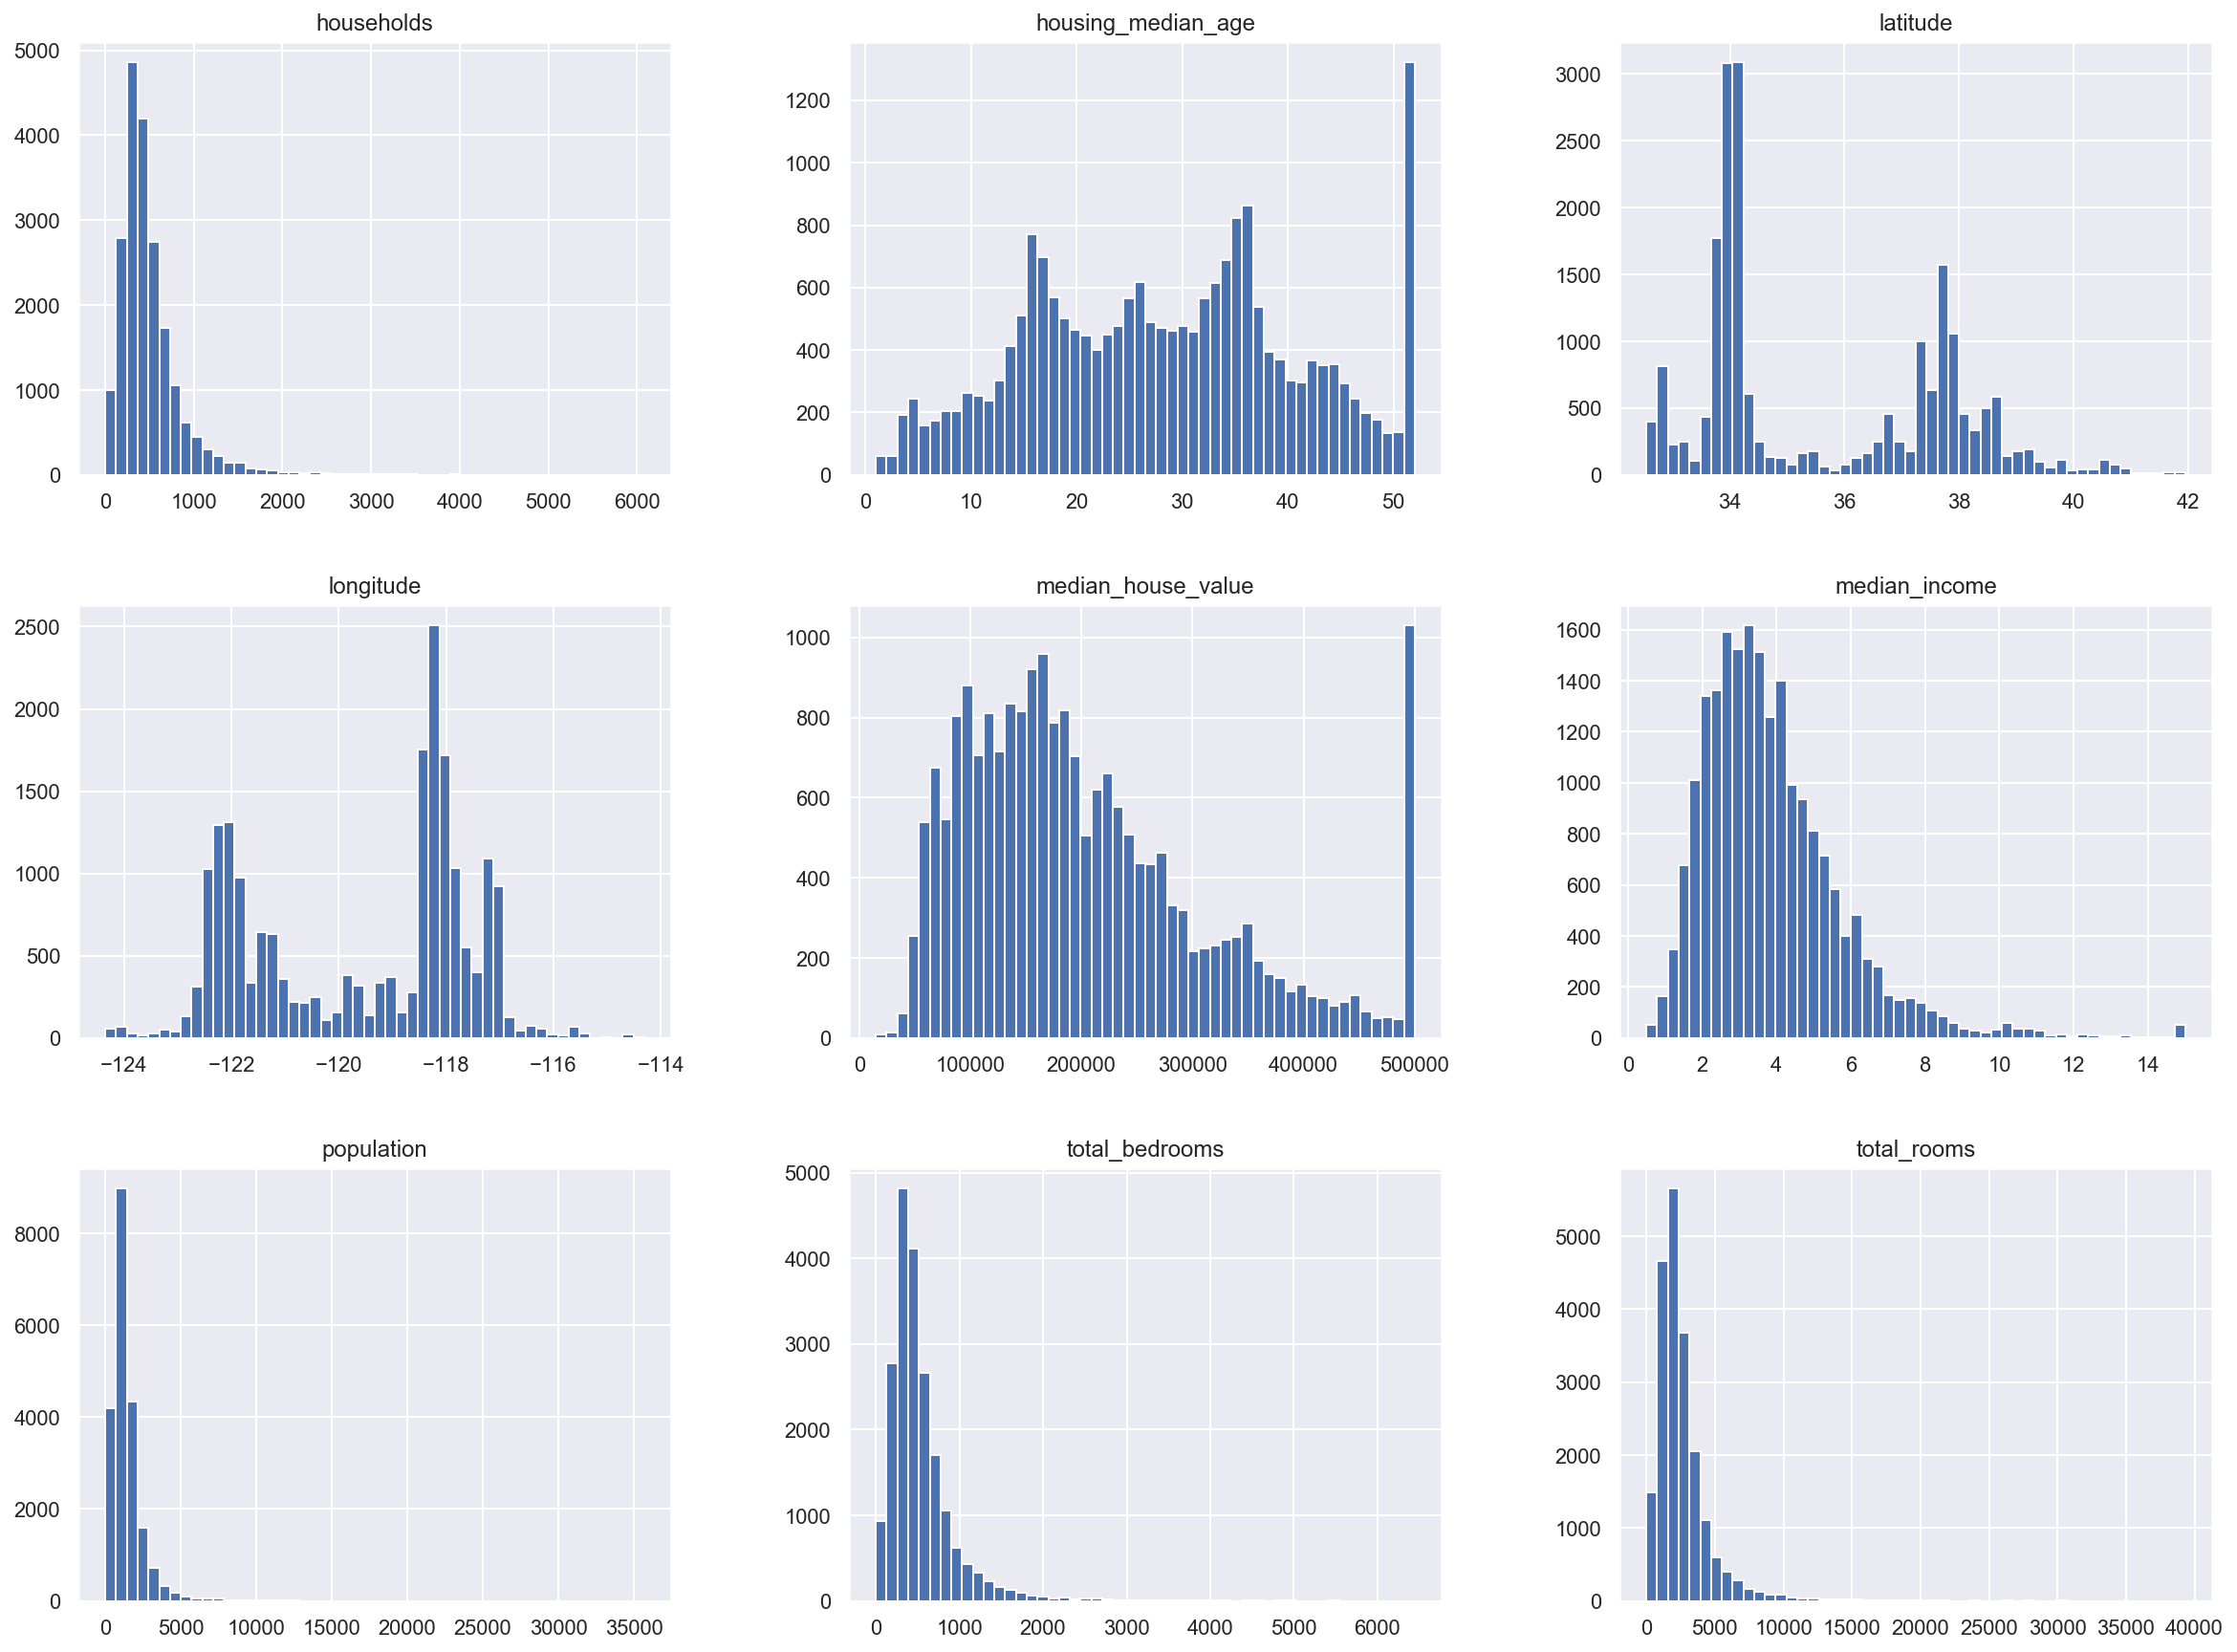

In [10]:
df.hist(bins=50, figsize=(20,15));

Notar que el ingreso promedio (*median income*) claramente no está expresado en dólares. El valor está preprocesado de manera que el máximo es $15$ para los ingresos más altos y el mínimo $0.5$ para los más bajos.

La edad y el valor de casa promedio tienen "cortados" sus valores máximos (i.e todo valor promedio de casa superior a $500.000$ aparece como $500.000$). Esto podría ser un problema si uno quiere predicciones precisas para valores mayores a $500.000$.

Muchos histogramas tienen *colas* muy largas. Algunos métodos de ML funcionan mejor si los atributos tienen una forma más normal (campana de Gauss), así que es posible que los transformemos.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5]) 

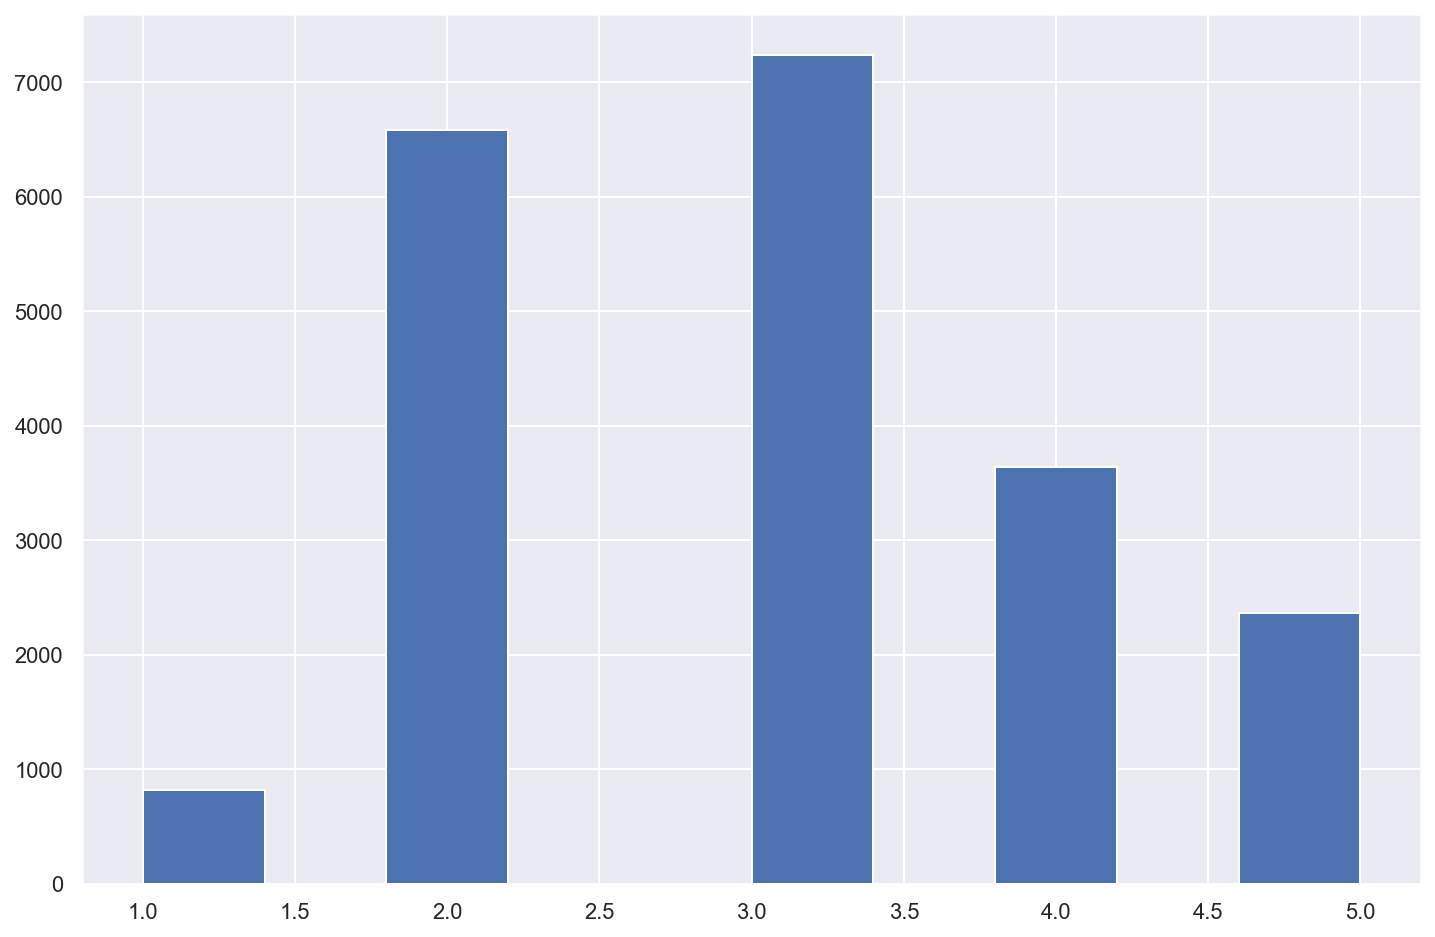

In [13]:
df["income_cat"].hist();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


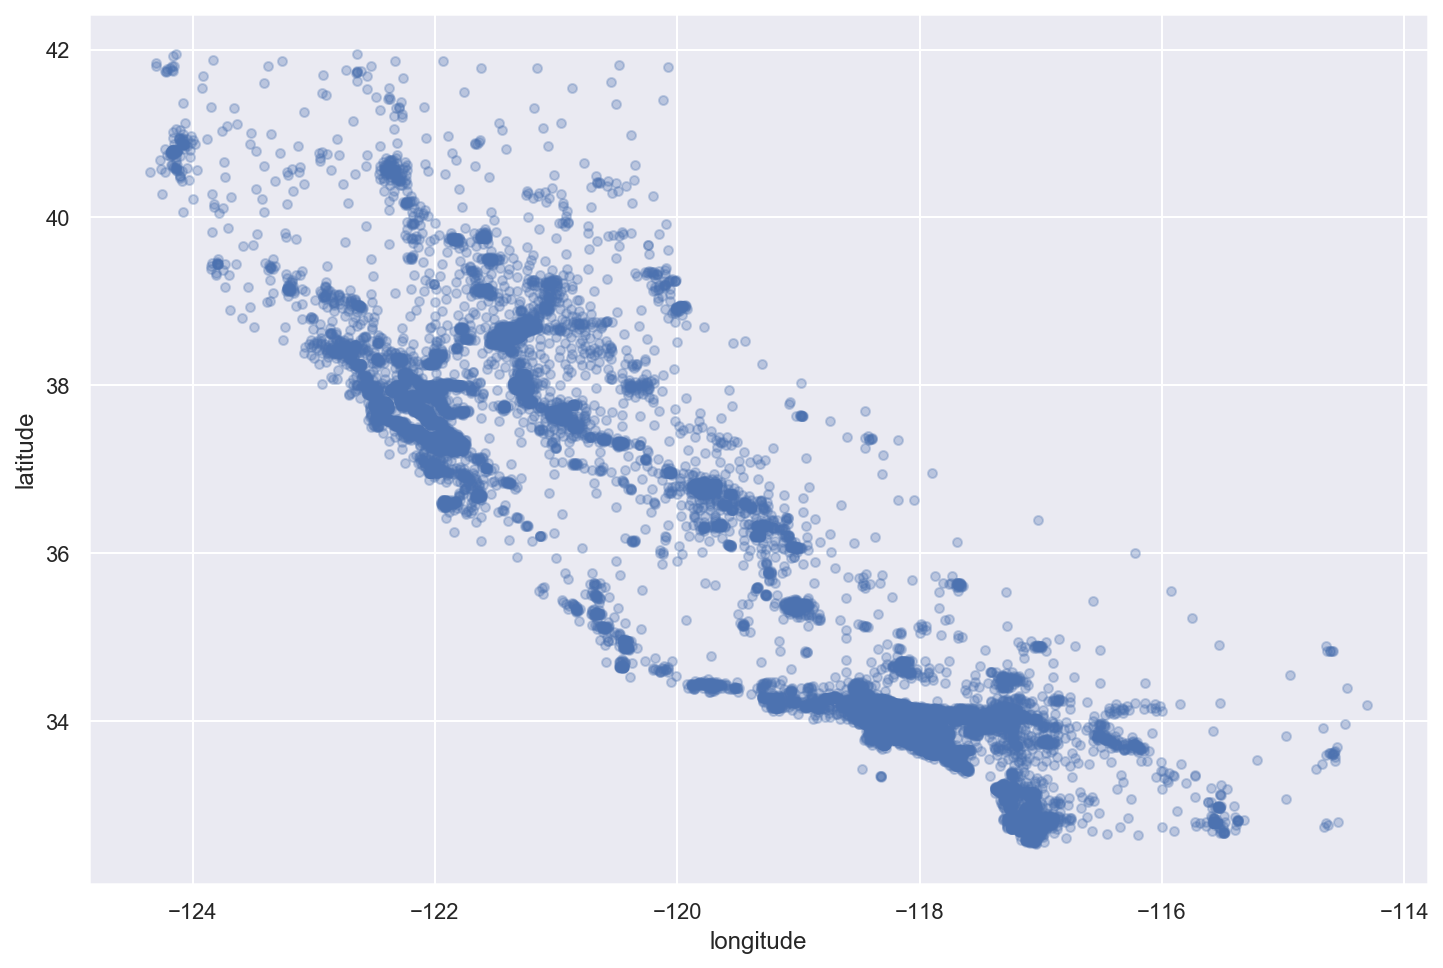

In [14]:
df.plot(kind="scatter", x="longitude",y="latitude", alpha=0.3);

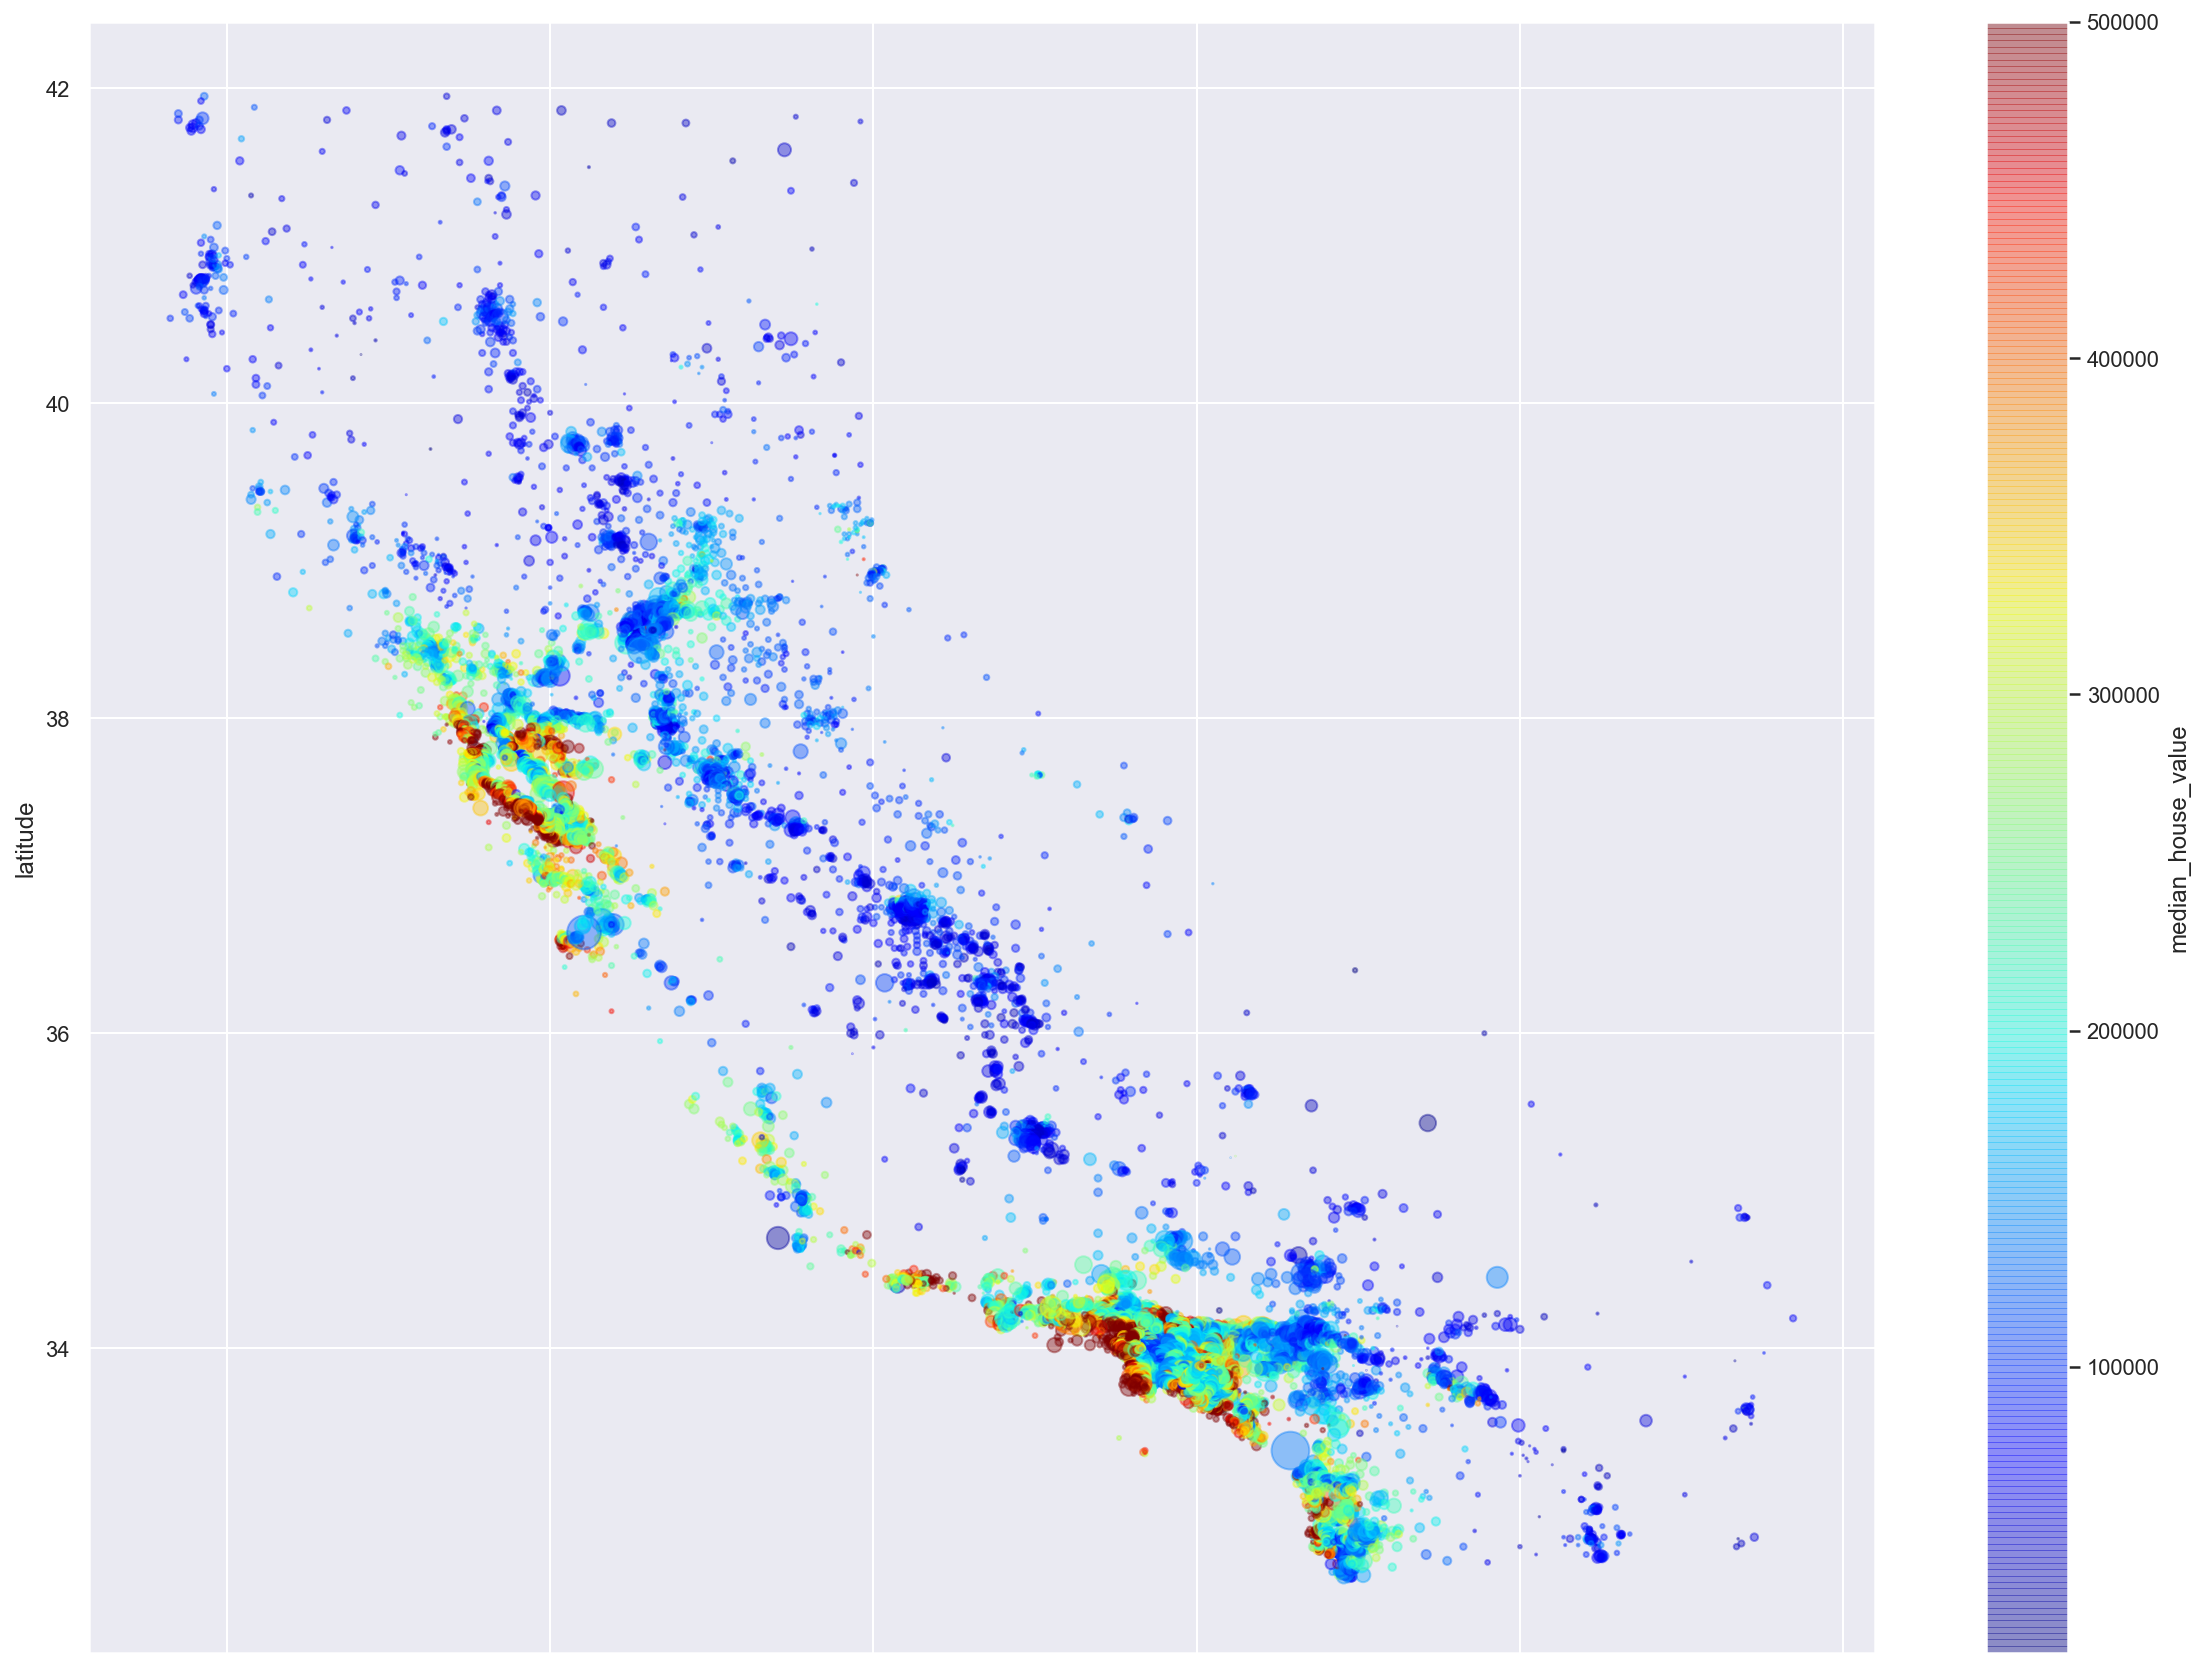

In [15]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, figsize=(20,15),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True);

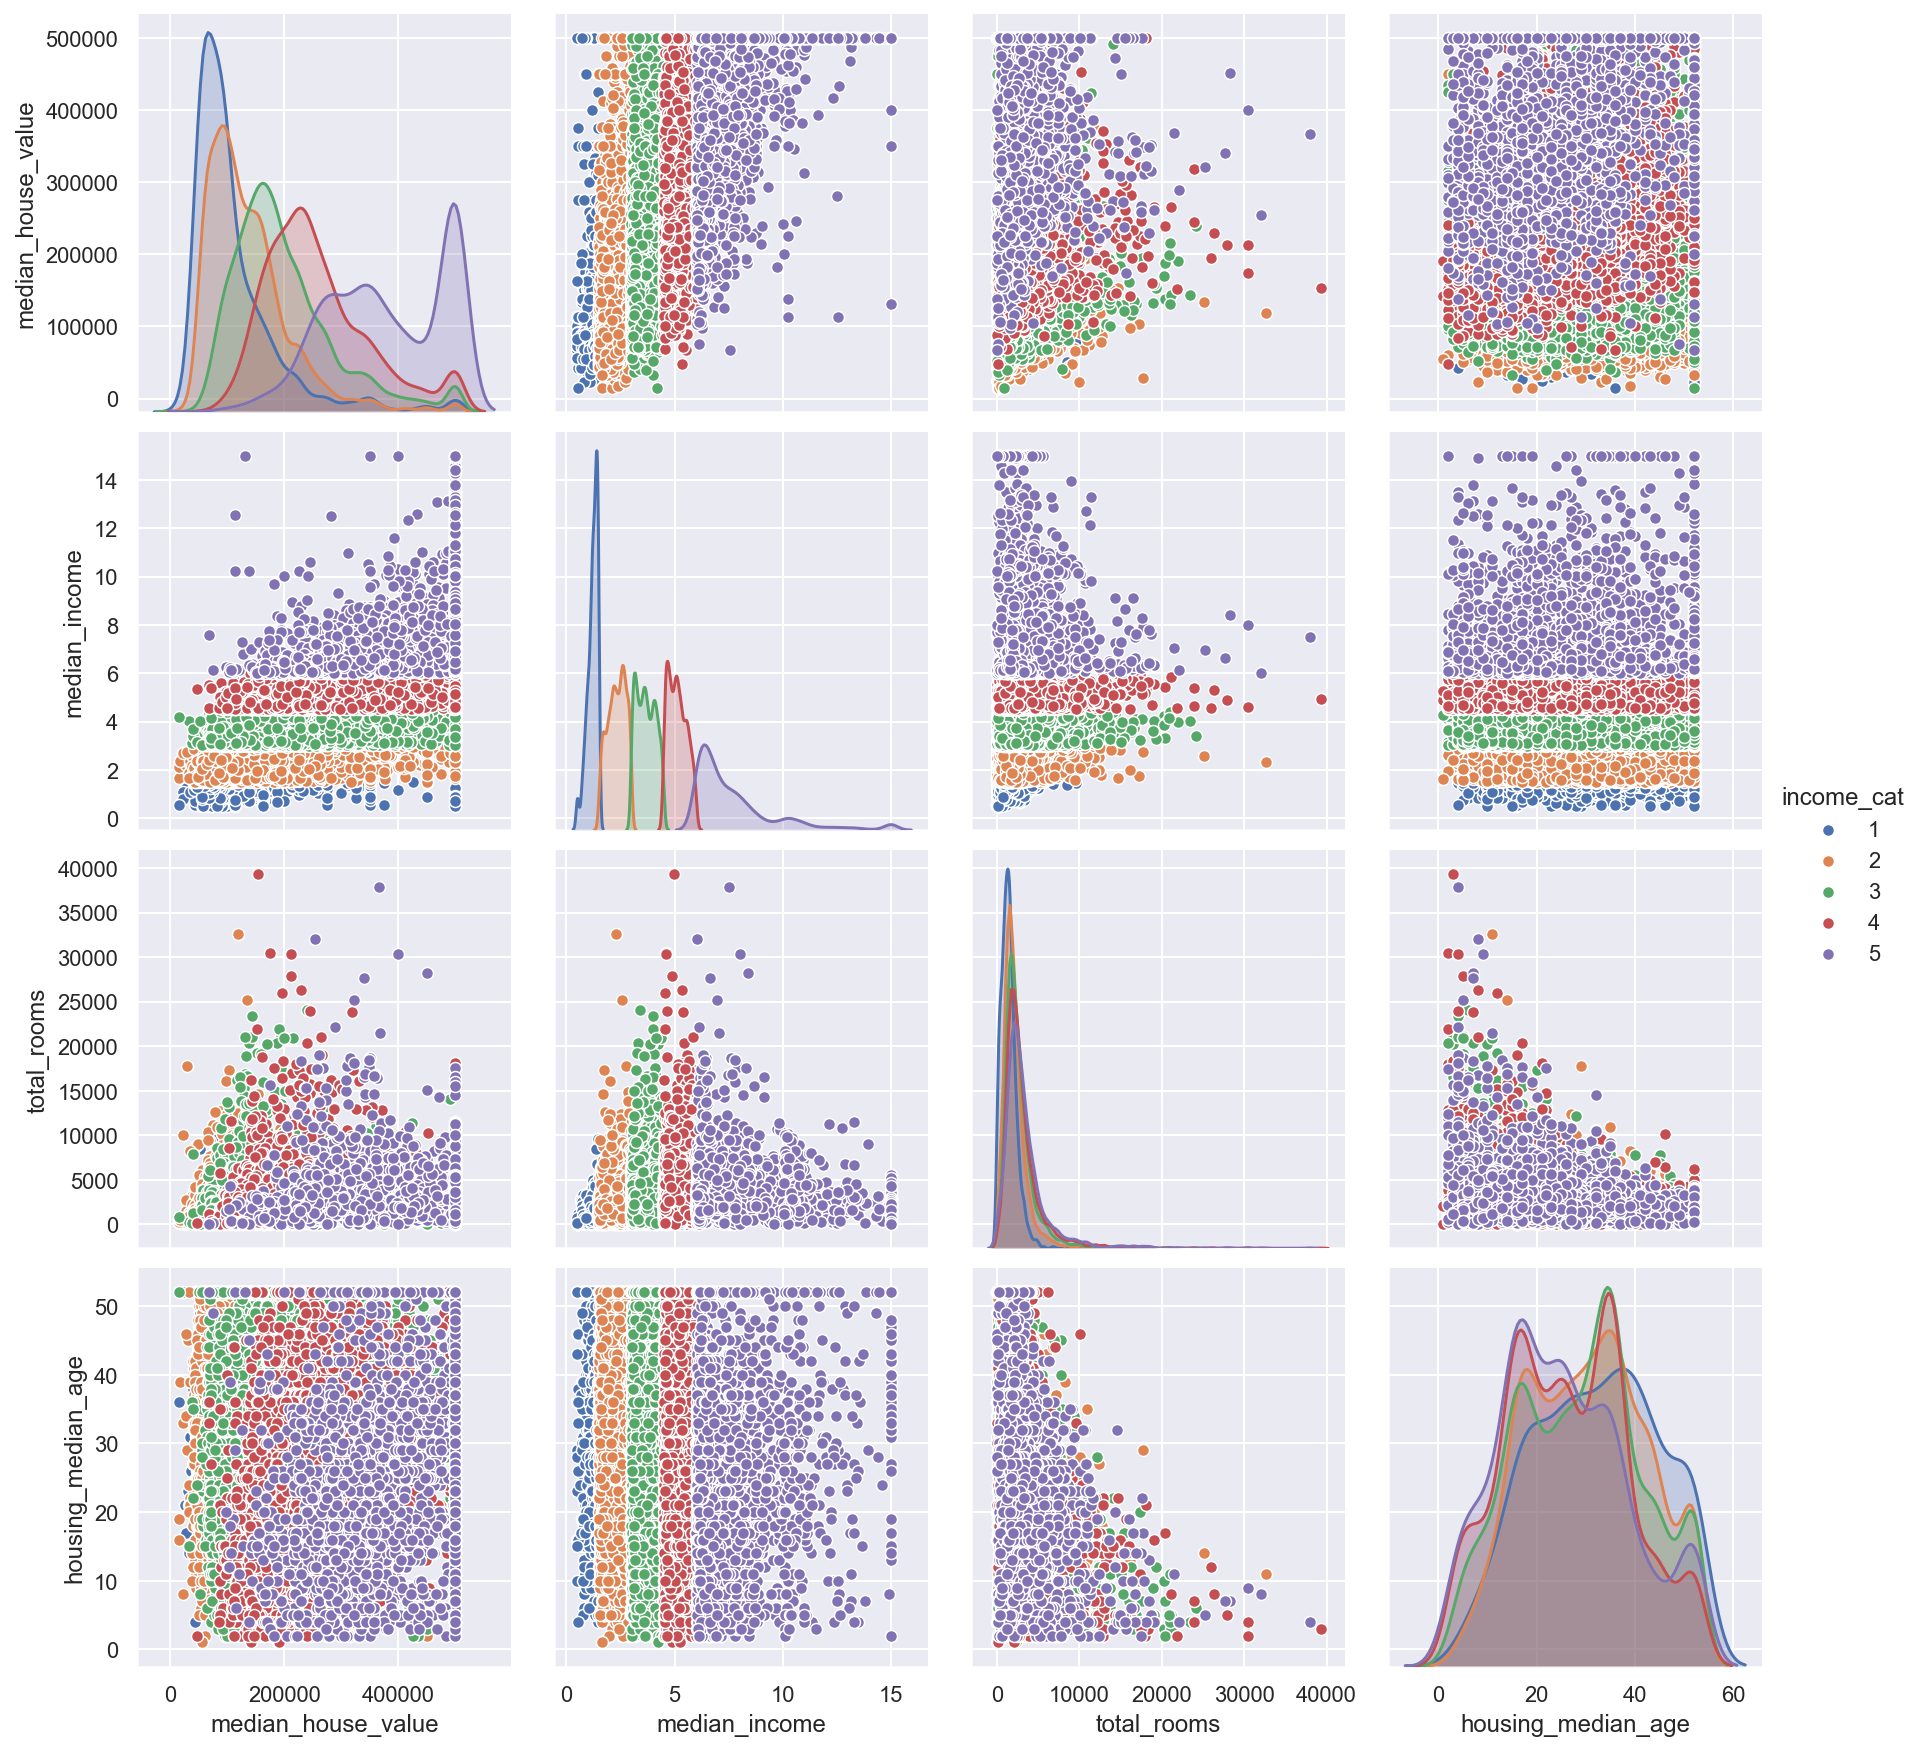

In [16]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "income_cat"]
sns.pairplot(data=df[attributes], hue='income_cat', height=3, aspect=1);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


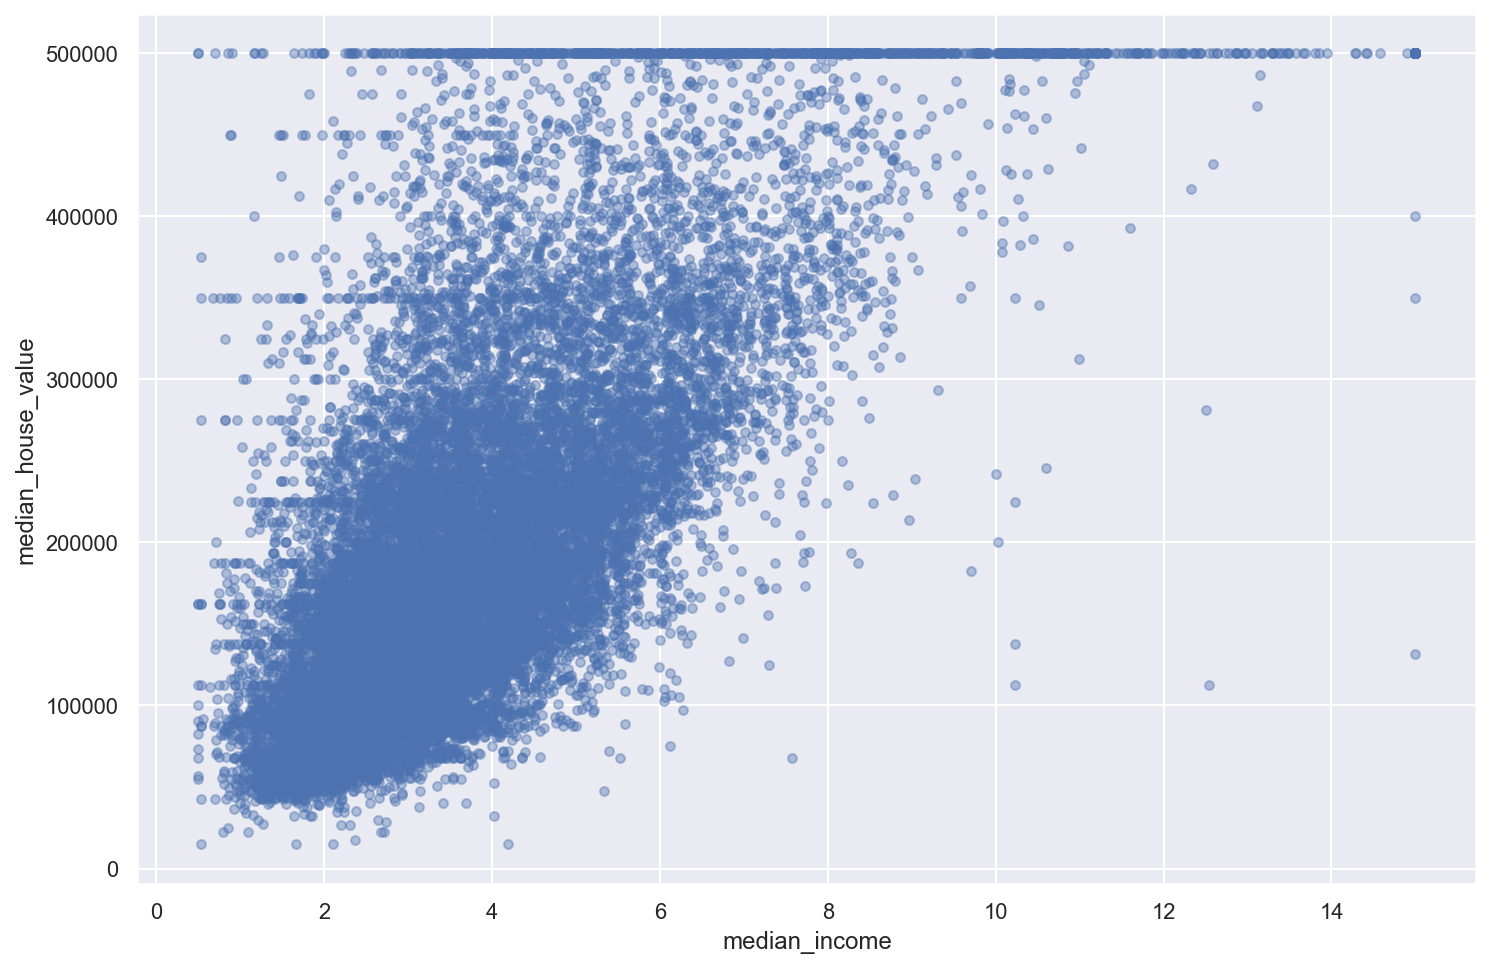

In [17]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4);

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[trainIndex]
    strat_test_set = df.loc[testIndex]

In [19]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

encoder = OneHotEncoder()
housing_cat_1_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [28]:
roomsIX, bedroomsIX, populationIX, householdsIX = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.addBedroomsPerRoom = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,roomsIX]/X[:,householdsIX]
        population_per_household = X[:,populationIX]/X[:,householdsIX]
        if self.addBedroomsPerRoom:
            bedrooms_per_room = X[:,bedroomsIX]/X[:,roomsIX]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [29]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

In [31]:
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                        ('cat_encoder', OneHotEncoder()),
                        ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline),])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape, housing_labels.shape)

(16512, 16) (16512,)
